## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df[df.converted==1].shape[0] / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
a= df[(df.group=='treatment') & (df.landing_page=='old_page')].shape[0]
b= df[(df.group=='control') & (df.landing_page=='new_page')].shape[0]
c = a + b

a,b,c

(1965, 1928, 3893)

f. Do any of the rows have missing values?

In [7]:
df.isna().count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
drop = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index.values
df2 = df.drop(index=drop).copy()

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
print(df2[df2.user_id.duplicated(keep = False)].index)

Int64Index([1899, 2893], dtype='int64')


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(index = 1899, inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2[df2.converted==1].shape[0] / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2[(df2.converted==1) & (df2.group=='control')].shape[0] / df2[df2.group=='control'].shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2[(df2.converted==1) & (df2.group=='treatment')].shape[0] / df2[df2.group=='treatment'].shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
df[df['group']== 'treatment'].shape[0] / df.shape[0]

0.5001256460584492

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> **Answer:** From the sample, the average conversion measure suggests the opposite is true. But I think there is still more analysis that needs to be done.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

> **Answer:**  
> $H_0$: **$p_{old}$** $\ge$ **$p_{new}$**  
> $H_1$: **$p_{old}$** $<$ **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [18]:
null = df.loc[df.converted == 1].shape[0]/df.shape[0]

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p0_new = null
p0_new

0.11965919355605512

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p0_old = null
p0_old

0.11965919355605512

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = df2.loc[df2.group == 'treatment'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2.loc[df2.group == 'control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice(2, df2.shape[0], p=[1-null, null])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice(2, df2.shape[0], p=[1-null, null])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

0.0012767392561187085

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
p_diffs = []

# Old, slower calculation:
# for _ in range(10000):
    # old_page_converted = np.random.choice(2, df2.shape[0], p=[1-null, null])
    # new_page_converted = np.random.choice(2, df2.shape[0], p=[1-null, null])
    # new_page_converted.mean() - old_page_converted.mean()
    #p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

# Faster calculation, using vectorized computation:
new_converted_simulation = np.random.binomial(n_new, null, 10000)/n_new 
old_converted_simulation = np.random.binomial(n_old, null, 10000)/n_old 
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

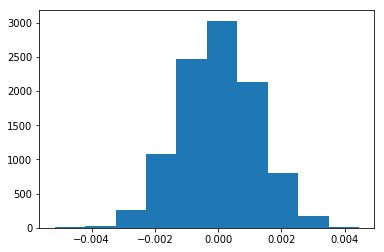

In [27]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
p_ctr = sum((df2.group == 'control') & (df2.converted == 1)) / sum(df2.group == 'control')
p_trt = sum((df2.group == 'treatment') & (df2.converted == 1)) / sum(df2.group == 'treatment')
p_diffs_actual = p_trt - p_ctr

In [29]:
# incorrect calcualtion below. Averages incorectly calculated.
# p_diffs_actual = (df2[(df2.group == 'treatment') & (df2.converted == 1)].shape[0] - df2[(df2.group == 'control') & (df2.converted == 1)].shape[0]) / df2.shape[0]

In [30]:
p_diffs_array = np.array(p_diffs)
value = p_diffs_array[p_diffs_array > p_diffs_actual].shape[0]/p_diffs_array.shape[0]
value, (1-value)

(0.903, 0.09699999999999998)

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> **Answer:** In part **j**, the computed a value equal to 1 minus the $p$-value threshold. This means that in order for the difference of conversion rates to be significant, the proportion that are greater than the actual difference must be greater than the computed value or less than 0.097.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2[(df2.group == 'control') & (df2.converted == 1)].shape[0]
convert_new = df2[(df2.group == 'treatment') & (df2.converted == 1)].shape[0]
n_old = df2[df2.group == 'control'].shape[0]
n_new = df2[df2.group == 'treatment'].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [32]:
nobs = np.array([n_old, n_new])
count = np.array([convert_old, convert_new])

sm.stats.proportions_ztest(count, nobs, alternative = 'smaller')

(1.3109241984234394, 0.90505831275902449)

In [33]:
# Below code is for my own learning. Just playing around to see how the results change.
array = np.random.choice(2, n_old, p=[.883,.117])
convert_old_test = np.count_nonzero(array)

nobs = np.array([n_old, n_new]);
count_test = np.array([convert_old_test, convert_new])
sm.stats.proportions_ztest(count_test, nobs, alternative = 'smaller')

(-1.9274233501118099, 0.026963445980537612)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> **Answer:** The $p$-value is greater than the value that was needed to suggest statistical significance that the treatment provided a higher conversion rate that the control.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> **Answer:** Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2['intercept'] = 1
df2[['ab_page_not', 'ab_page']] = pd.get_dummies(df.group)

In [35]:
Logit_mod = sm.Logit(df2.converted, df2[['intercept','ab_page']])
results = Logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-10 20:51 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
import scipy.special as sc

In [37]:
# Exponentiating the coeficients here to create a linear model.
def conv_predict(ab_vals):
    print(sc.softmax(-1.9888 - 0.015*(ab_vals)))

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

> Where 0 represents the control and 1 represents the treatment, the control has a higher probability of conversion:

In [38]:
conv_predict(np.array([0,1]))

[ 0.50374993  0.49625007]


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

> **Answer:** p-value is 0.1897. In **Part II**, the alternative hypothesis is that the conversion rate for the treatment group is greater than that of the control (one-tailed). In the regression above, the alternative is simply that the conversion rate for the control and the treatment are not equal/different (two-tailed).

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> **Answer:** Other factors that could be considered are the datetime of the entries or other user profile data like age, location, or length of site usership (like if they have an account). Parsing the results across these additional features may help better understand whether the effects, or lack thereof, of the new page can be generalized or is only applicable to certain groups. Additional terms may also increase the chance that certain features are less statistically significant. Furthermore, multicollinearity - relationships between multiples variables that may be hard to detect -  is also a consideration.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
df_c = pd.read_csv('countries.csv')
df_c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
df3 = df2.merge(df_c, on ='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page_not,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US


In [41]:
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3.country)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page_not,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1


In [42]:
Logit_mod = sm.Logit(df3.converted, df3[['intercept','CA', 'UK']])
results = Logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-10 20:51 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

In [43]:
np.exp(-0.0408), np.exp(0.009)

(0.96002111497165088, 1.0090406217738679)

> It does not appear that country code has an effect on the conversion rate. The exponentiated intercepts are very close to 1. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
df3['ab_UK'] = df3['ab_page'] * df3['UK']
df3['ab_CA'] = df3['ab_page'] * df3['CA']

In [45]:
Logit_mod = sm.Logit(df3.converted, df3[['intercept','ab_page','ab_CA', 'ab_UK']])
results = Logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-10 20:51 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0183    0.0126    -1.4486  0.1475  -0.0430   0.0064
ab_CA        -0.0644    0.0384    -1.6788  0.0932  -0.1396   0.0108
ab_UK         0.0257    0.0188     1.3634  0.1728  -0.0112   0.0625
==================================================================

"""

In [51]:
np.exp(-0.0183), np.exp(-0.0644), np.exp(0.0257)

(0.98186642824142034, 0.9376298725613128, 1.0260330923696246)

> The conversion rates for the treatment group by country appear not to be really different across countries or compared to the base conversion rate for the treatment gorup. 

<a id='conclusions'></a>
## Conclusions
From the above analysis, the treatment page does not appear to be effective in increasing the conversion rate compared to the control group. In Part II, a hypothesis test was run and the current analysis fails to reject the null hypothesis, or the hypothesis that the treatment page resulted in a significantly larger proportion of converts. In fact, it appears that, in general, the original page is slightly more likely to result in a convert. In Part III, a logisitic regression analysis was performed to discern any insights from evaluating the data with respect to the country location associated with the data's `user_id`'s. It was determined that the the conversion rates are not affected by user's countries. At present, it is not recommended to implement the treatment page. Increased granularity on the profile/features of the users, or an analysis of the datetime factors in the conversion could change this recommendation.

In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0